# Notebook Imports

In [1]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline

/home/sjvasconcello/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Gather Data

In [2]:
boston_dataset = load_boston()
type(boston_dataset)

sklearn.utils.Bunch

In [3]:
dir(boston_dataset)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [4]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
type(boston_dataset.data)

numpy.ndarray

In [6]:
boston_dataset.data.shape

(506, 13)

## Data exploration with Pandas Dataframes

In [7]:
data = pd.DataFrame(data=boston_dataset.data, columns=boston_dataset.feature_names)
data["PRICE"] = boston_dataset.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
data.count()

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
PRICE      506
dtype: int64

### Cleaning data - check for missing values

In [9]:
pd.isnull(data).any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
PRICE      False
dtype: bool

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


## Visualising Data - Histograms, Distributions and Bar Charts

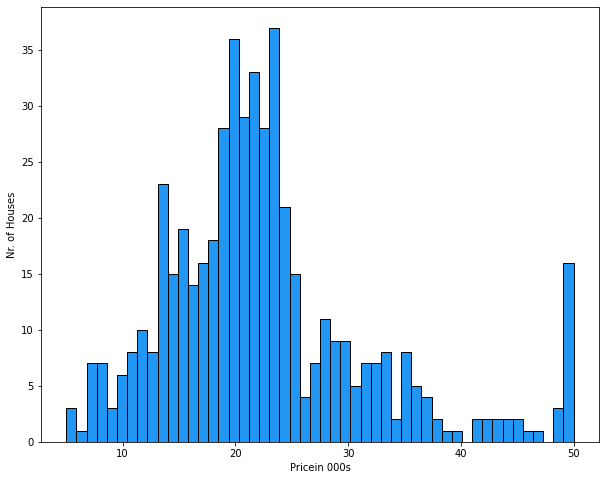

In [11]:
plt.figure(figsize=(10,8))
plt.hist(data["PRICE"],bins=50, ec="black", color="#2196f3")
plt.xlabel("Pricein 000s")
plt.ylabel("Nr. of Houses")
plt.show()

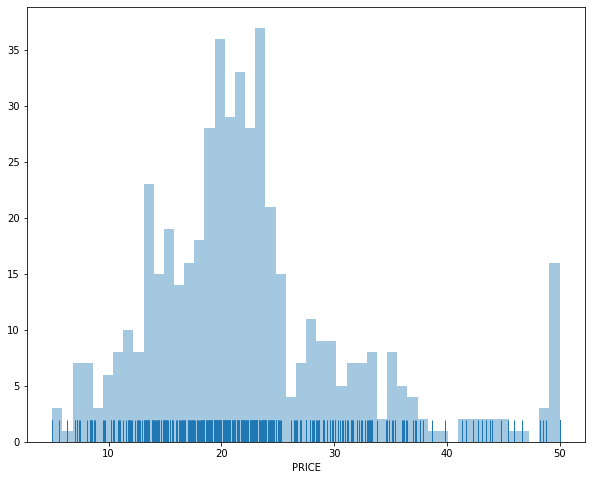

In [12]:
plt.figure(figsize=(10,8))
sns.distplot(data["PRICE"],bins=50,rug=True, hist=True, kde=False)
plt.show()

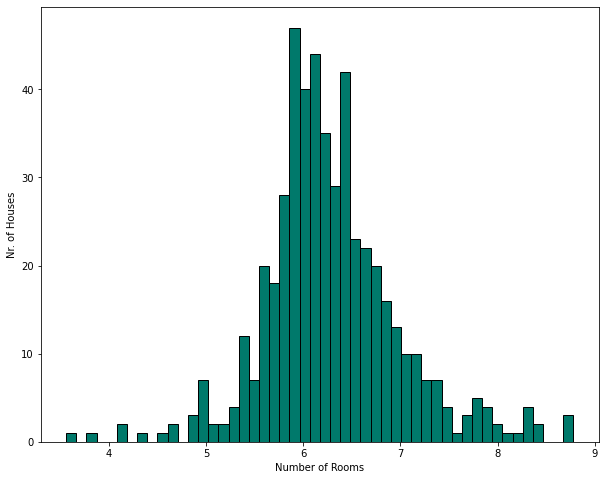

In [13]:
plt.figure(figsize=(10,8))
plt.hist(data["RM"],bins=50, ec="black", color="#00796b")
plt.xlabel("Number of Rooms")
plt.ylabel("Nr. of Houses")
plt.show()

In [14]:
data["RM"].mean()

6.284634387351787

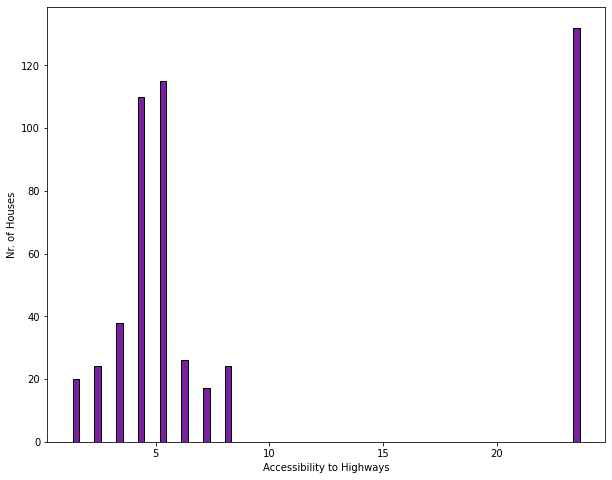

In [15]:
plt.figure(figsize=(10,8))
plt.hist(data["RAD"],bins=24, ec="black", color="#7b1fa2", rwidth=0.3)
plt.xlabel("Accessibility to Highways")
plt.ylabel("Nr. of Houses")
plt.show()

In [16]:
data["RAD"].value_counts()

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
8.0      24
2.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

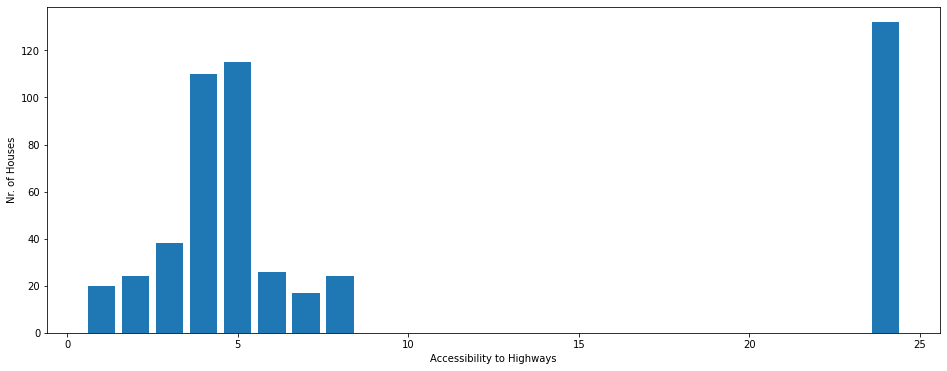

In [17]:
frequency = data["RAD"].value_counts()
plt.figure(figsize=(16,6))
plt.bar(frequency.index, height=frequency)
plt.xlabel("Accessibility to Highways")
plt.ylabel("Nr. of Houses")
plt.show()

In [18]:
data["CHAS"].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

### Descriptive Statistics

In [19]:
data["PRICE"].min()

5.0

In [20]:
data["PRICE"].max()

50.0

In [21]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Correlation

### $$ \rho_{xy} = corr(x,y) $$

### $$ -1.0 \leq \rho_{xy} \leq 1.0$$

In [22]:
data["PRICE"].corr(data["RM"])

0.6953599470715393

In [23]:
data["PRICE"].corr(data["PTRATIO"])

-0.5077866855375616

In [24]:
data.corr() # Person correlation coefficient

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [25]:
mask = np.zeros_like(data.corr())
triangule_indices = np.triu_indices_from(mask)
mask[triangule_indices] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

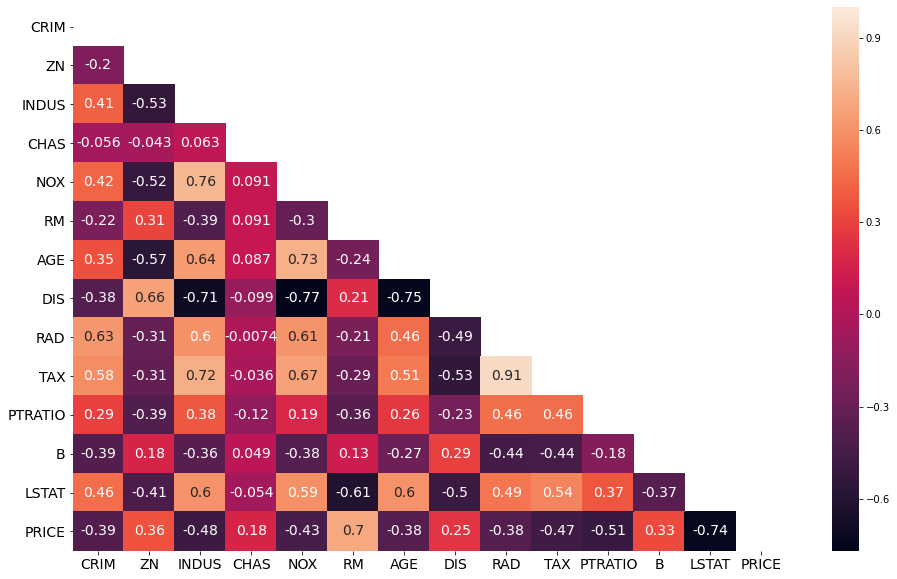

In [26]:
# RAD no la podes utilizar porque no es continuo
# CHAS tampoco porqie es solo 0 y 1
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(), mask=mask, annot=True, annot_kws={"size": 14})
sns.set_context("paper")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

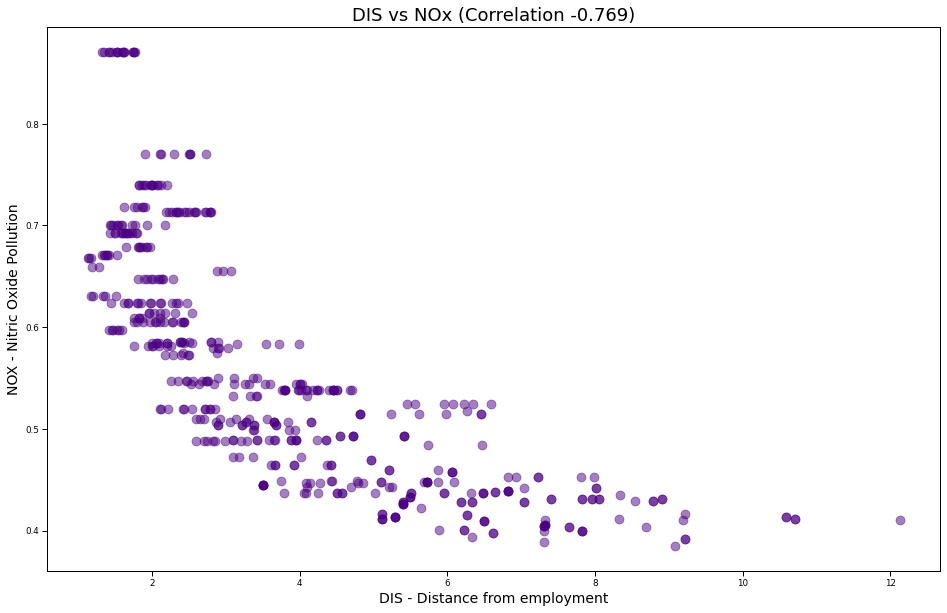

In [27]:
plt.figure(figsize=(16,10))

nox_dis_corr = round(data["NOX"].corr(data["DIS"]),3)
plt.title(f"DIS vs NOx (Correlation {nox_dis_corr})", fontsize=18)
plt.xlabel("DIS - Distance from employment", fontsize=14)
plt.ylabel("NOX - Nitric Oxide Pollution", fontsize=14)
plt.scatter(x=data["DIS"],y=data["NOX"], alpha=0.5, s=80, color="indigo")
plt.show()

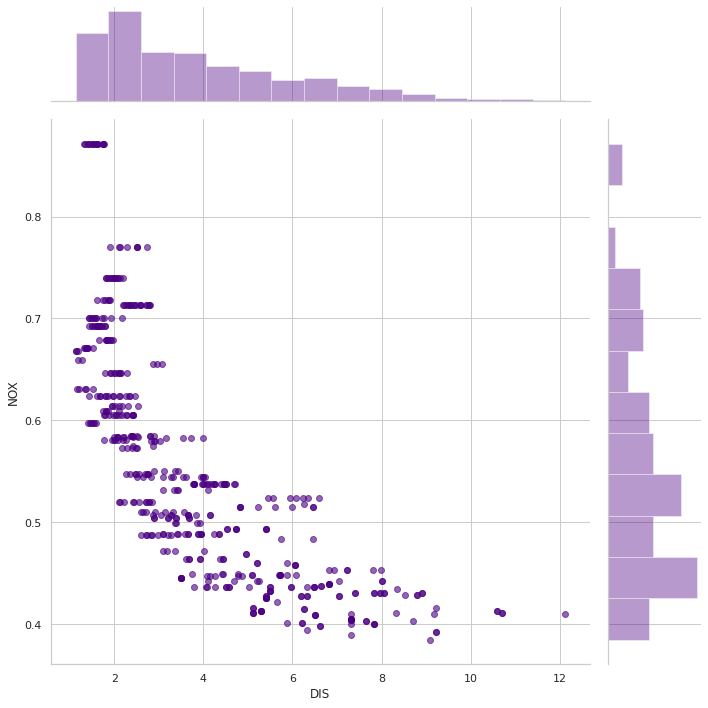

In [28]:
sns.set()
sns.set_style("whitegrid")
sns.jointplot(x=data["DIS"],y=data["NOX"], height=10, joint_kws={"alpha":0.6}, color="indigo")
plt.show()

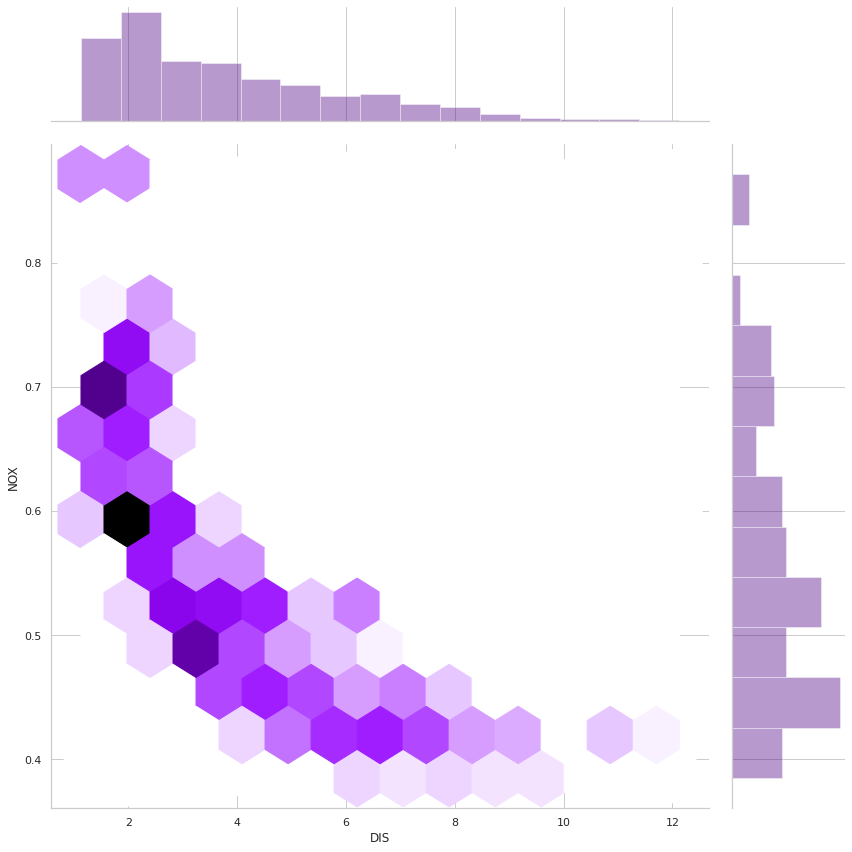

In [29]:
sns.set()
sns.set_style("whitegrid")
sns.jointplot(x=data["DIS"],y=data["NOX"], height=12, color="indigo", kind="hex")
plt.show()

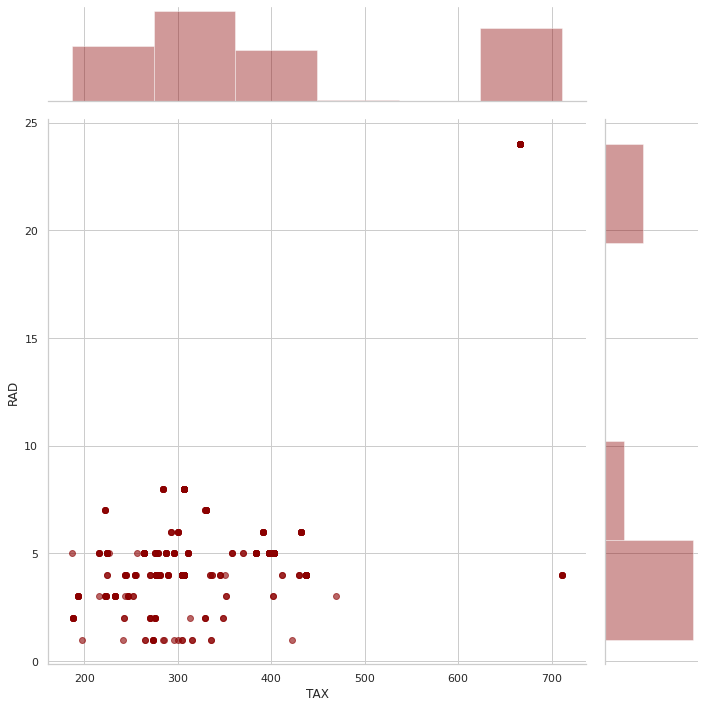

In [30]:
sns.set()
sns.set_style("whitegrid")
sns.jointplot(x=data["TAX"],y=data["RAD"], height=10, joint_kws={"alpha":0.6}, color="darkred")
plt.show()

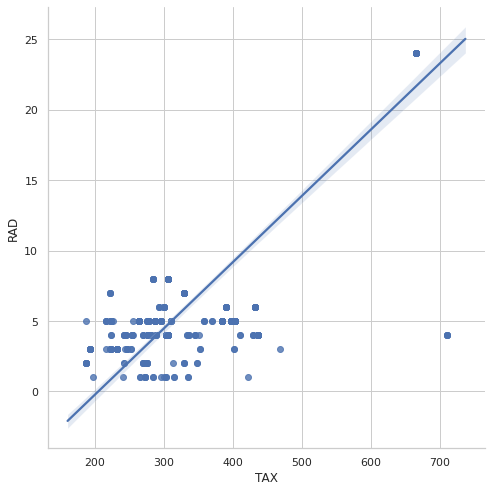

In [31]:
sns.lmplot(x="TAX", y="RAD", data=data, height=7)
plt.show()

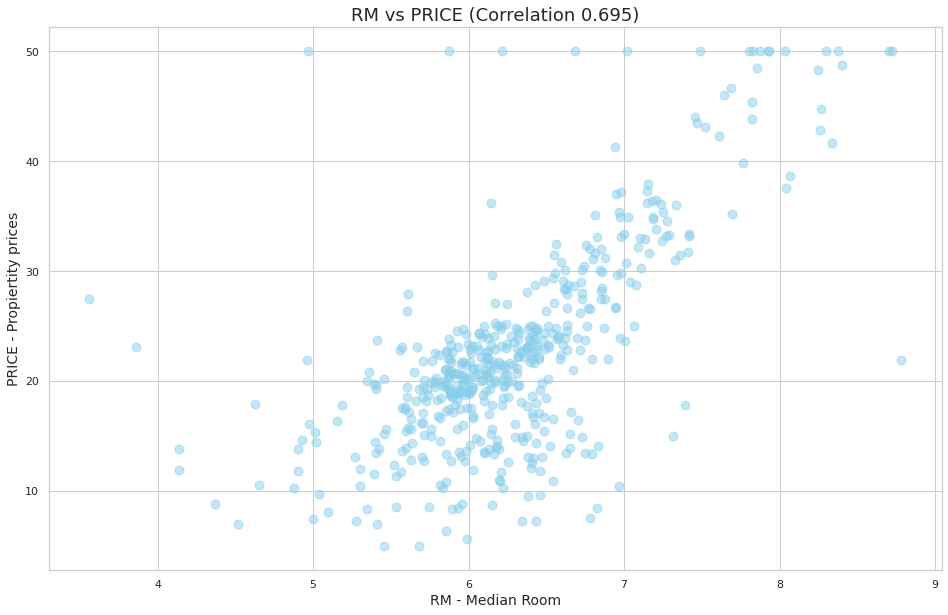

In [32]:
plt.figure(figsize=(16,10))

rm_tgt_corr = round(data["RM"].corr(data["PRICE"]),3)
plt.title(f"RM vs PRICE (Correlation {rm_tgt_corr})", fontsize=18)
plt.xlabel("RM - Median Room", fontsize=14)
plt.ylabel("PRICE - Propiertity prices", fontsize=14)

plt.scatter(x=data["RM"],y=data["PRICE"], alpha=0.5, s=80, color="skyblue")
plt.show()

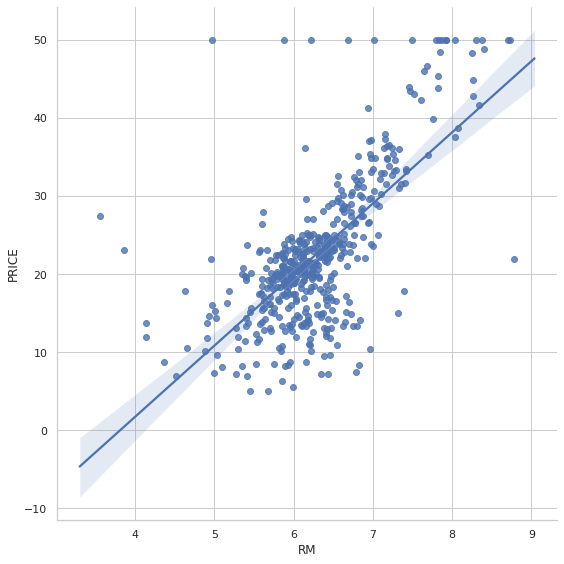

In [33]:
sns.lmplot(x="RM",y="PRICE", data=data, height=8)
plt.show()

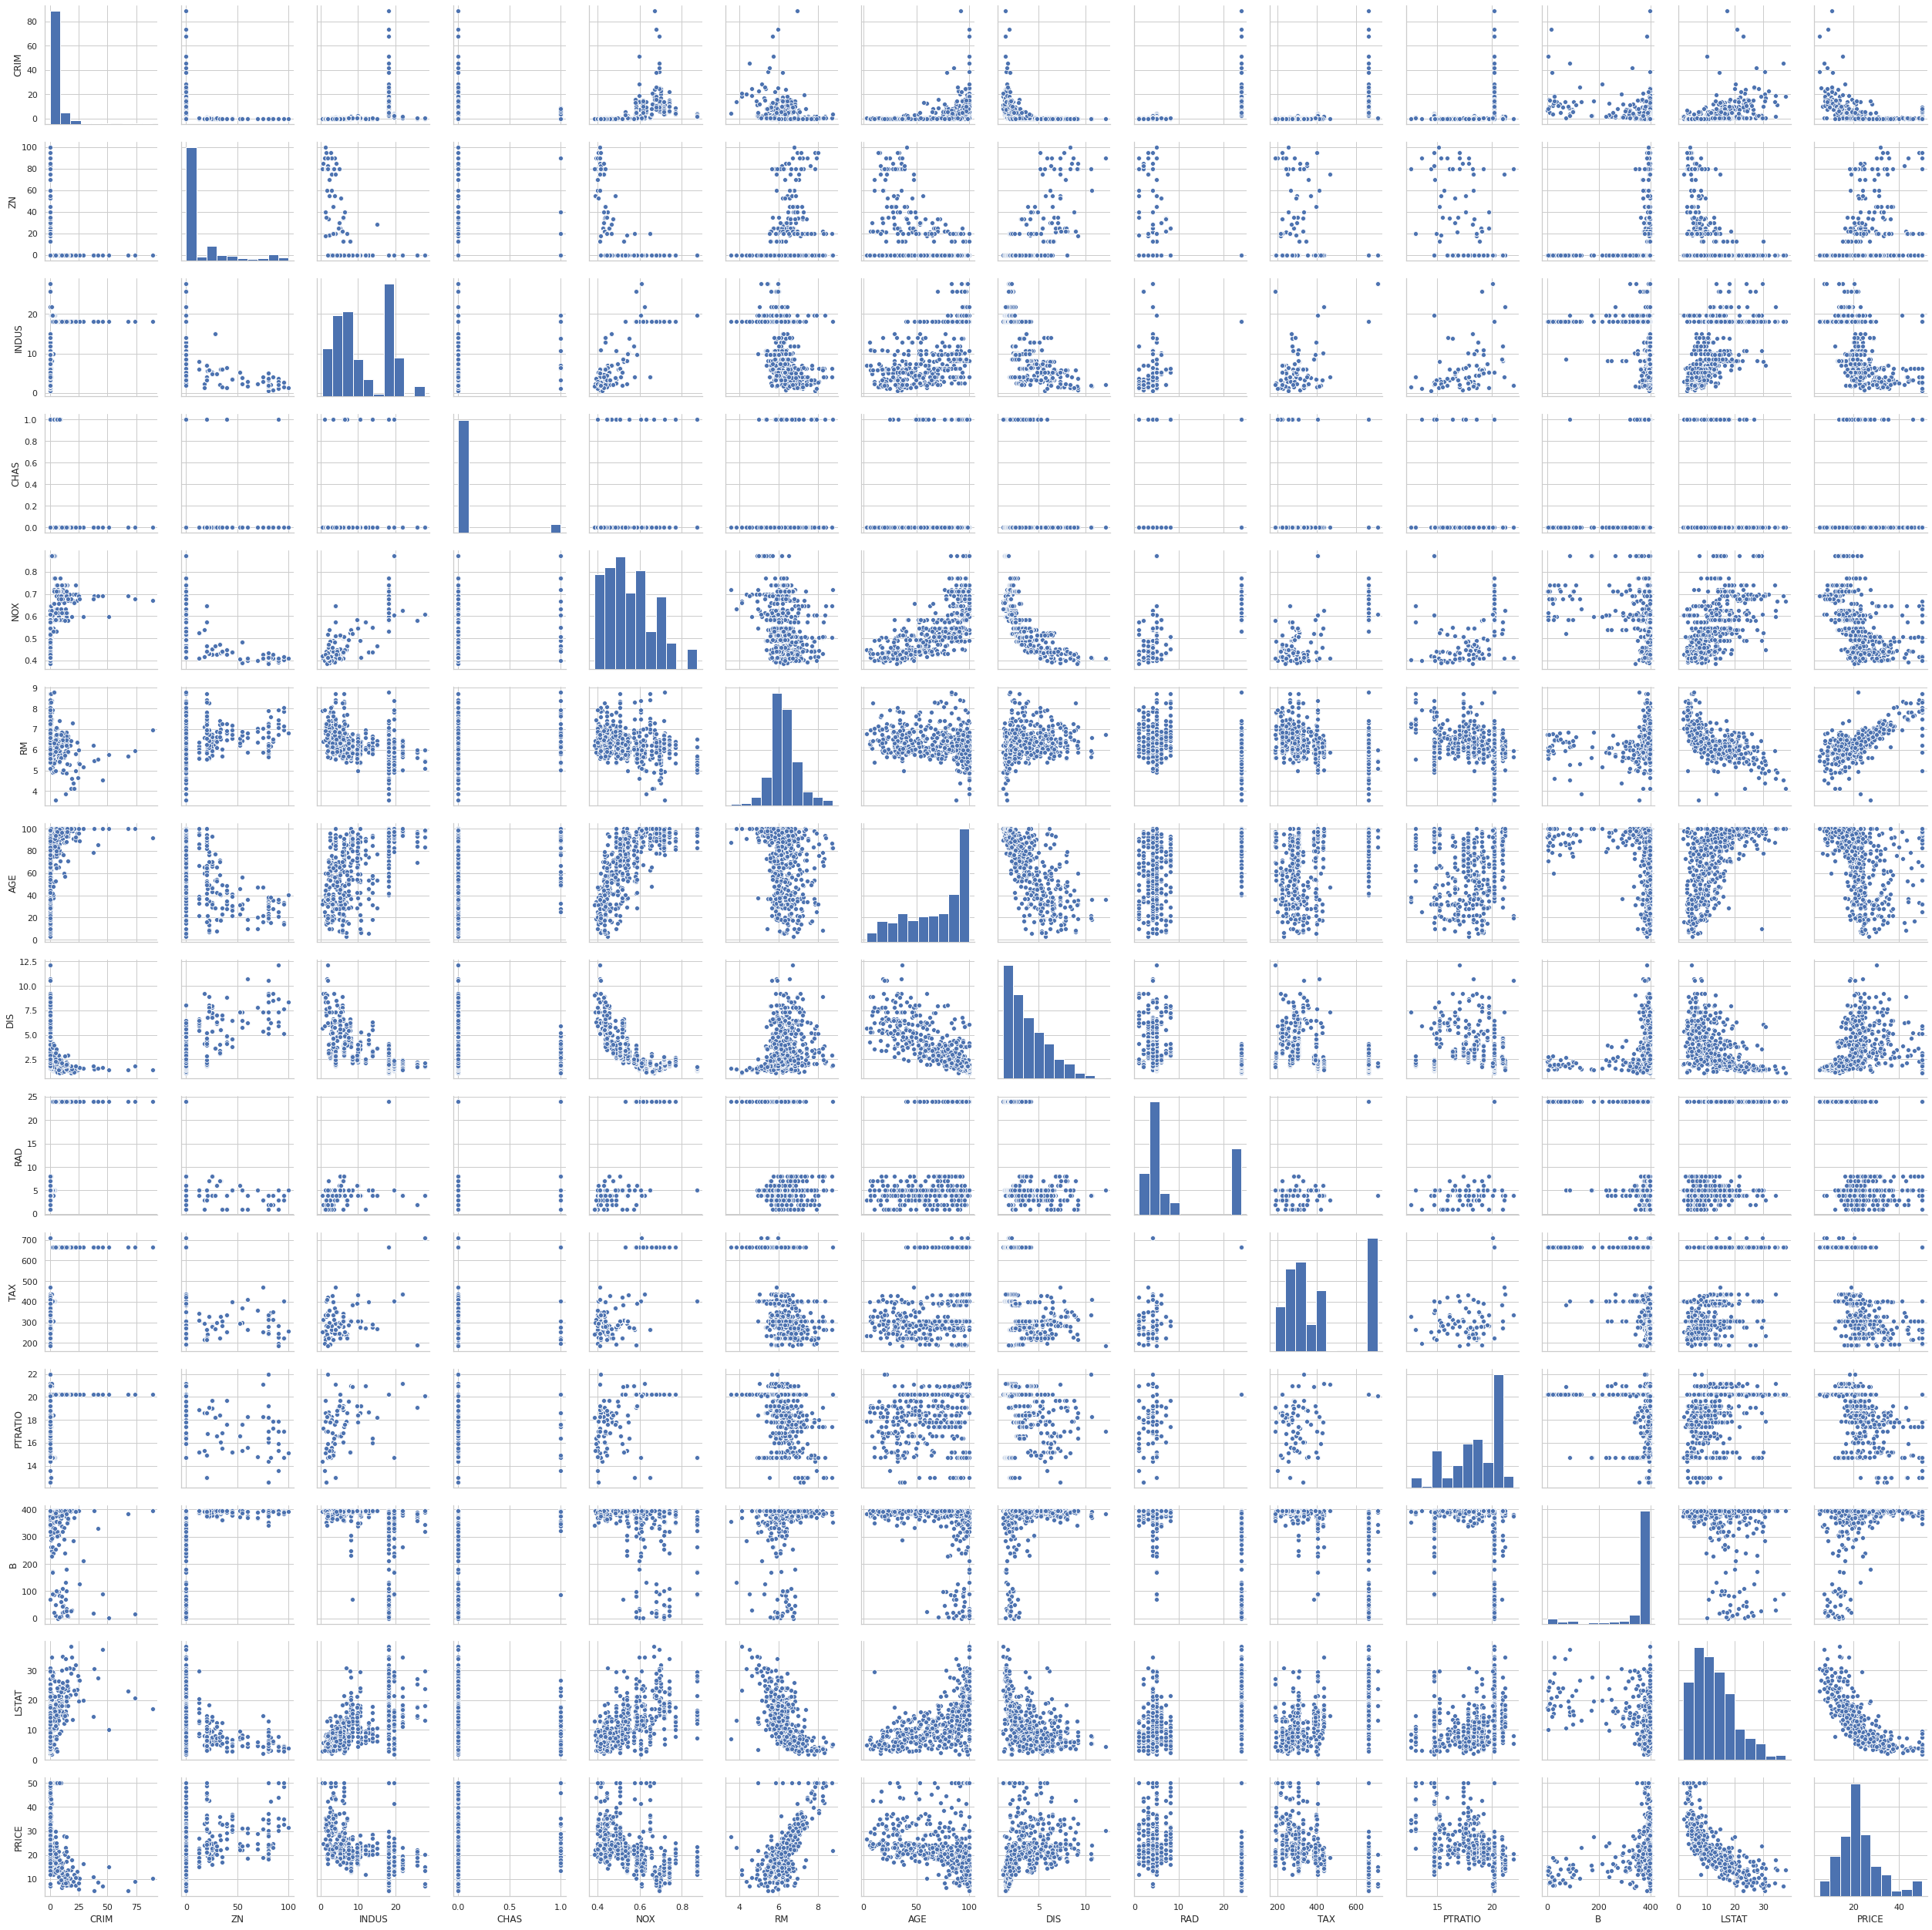

CPU times: user 1min 30s, sys: 11.5 s, total: 1min 42s
Wall time: 1min 20s


In [34]:
%%time
sns.pairplot(data)
plt.show()

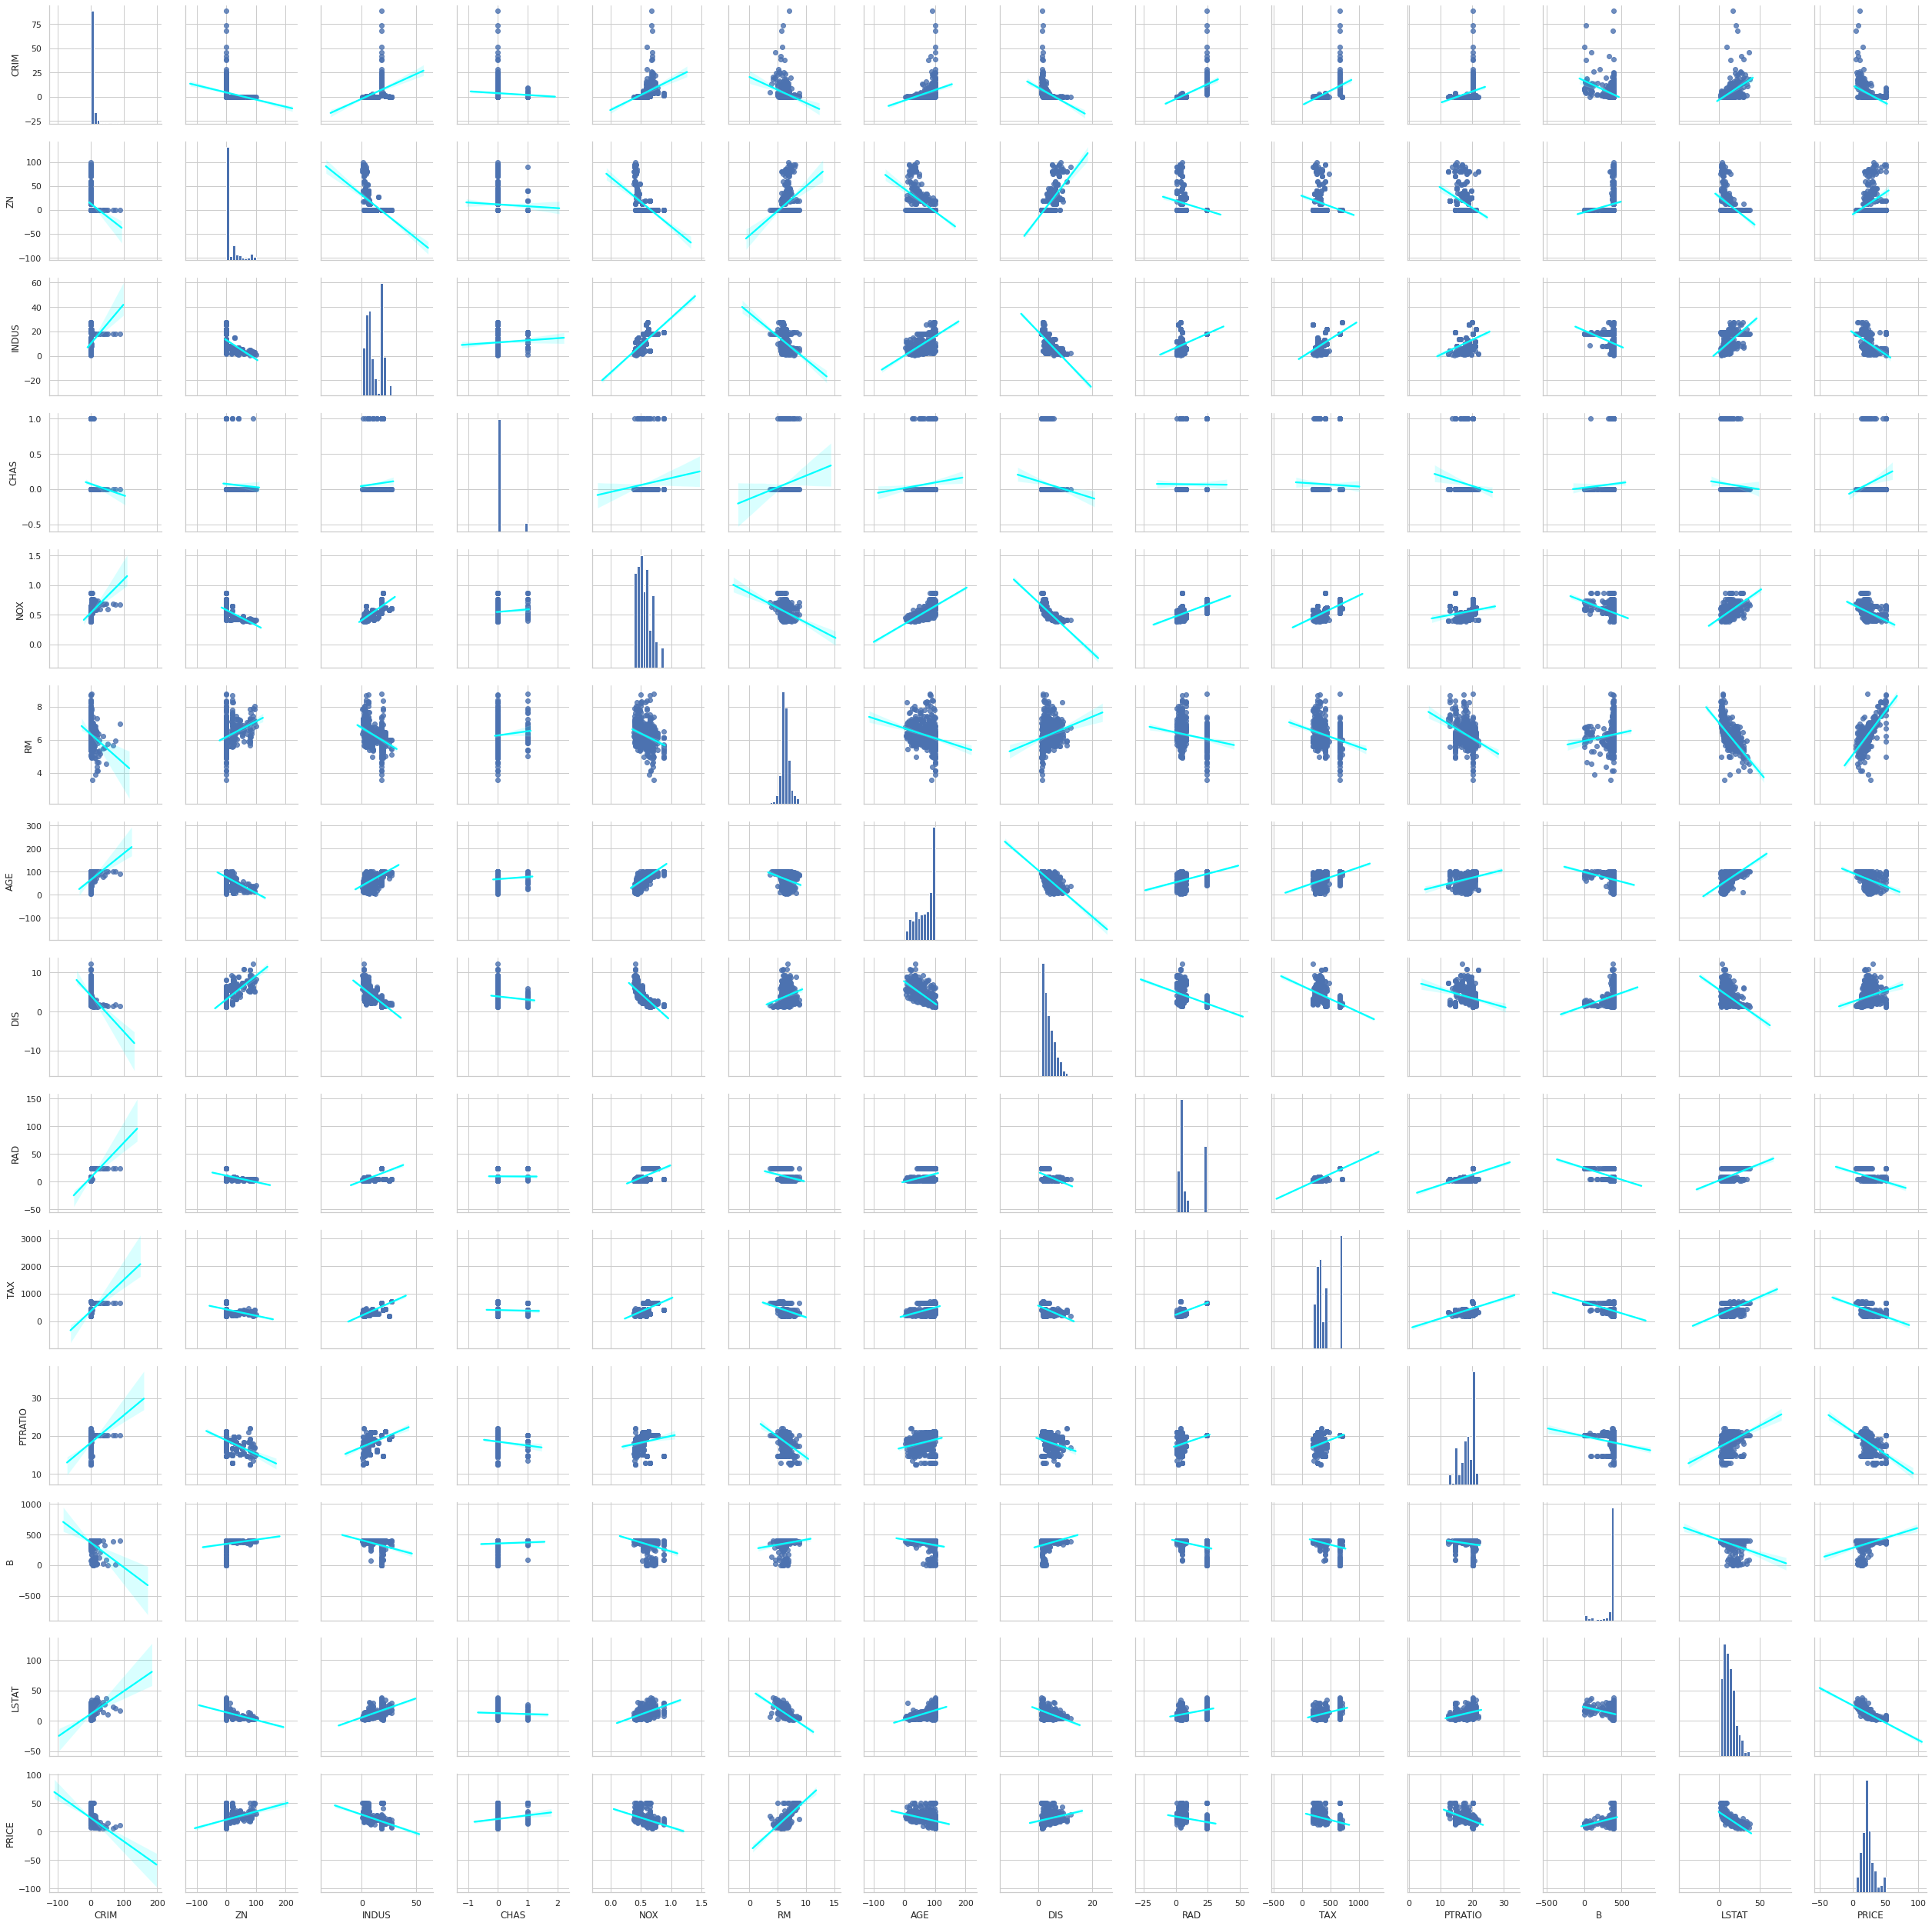

CPU times: user 2min 9s, sys: 21 s, total: 2min 30s
Wall time: 1min 49s


In [35]:
%%time
sns.pairplot(data, kind="reg", plot_kws={"line_kws": {"color": "cyan"} })
plt.show()

### Training & test dataset split

In [36]:
prices = data["PRICE"]
features = data.drop("PRICE", axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    prices, 
                                                    test_size=0.2, 
                                                    random_state=10)

len(X_train)/len(features)

0.7984189723320159

In [37]:
X_test.shape[0]/features.shape[0]

0.2015810276679842

## Multivariable Regression

In [38]:
%%time
regr = LinearRegression()
regr.fit(X_train, y_train)

CPU times: user 5.46 ms, sys: 215 µs, total: 5.67 ms
Wall time: 80.5 ms


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
print("Tntercept", regr.intercept_)
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=["coef"])

Tntercept 36.533051382824596


,coef
CRIM,-0.128181
ZN,0.063198
INDUS,-0.007576
CHAS,1.974515
NOX,-16.271989
RM,3.108456
AGE,0.016292
DIS,-1.483014
RAD,0.303988
TAX,-0.012082


In [40]:
print("Train data r-squared: ", regr.score(X_train, y_train))

Train data r-squared:  0.750121534530608


In [41]:
print("Test data r-squared: ", regr.score(X_test, y_test))

Test data r-squared:  0.6709339839115651


## Data Transformations

In [42]:
data["PRICE"].skew()

1.1080984082549072

In [43]:
y_log = np.log(data["PRICE"])
y_log.tail()

501    3.109061
502    3.025291
503    3.173878
504    3.091042
505    2.476538
Name: PRICE, dtype: float64

In [44]:
y_log.skew()

-0.33032129530987864

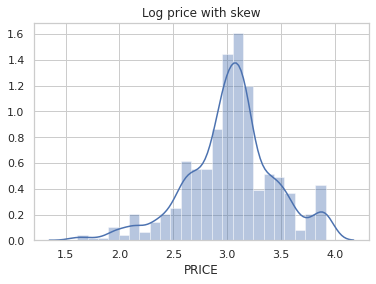

In [45]:
sns.distplot(y_log)
plt.title("Log price with skew")
plt.show()

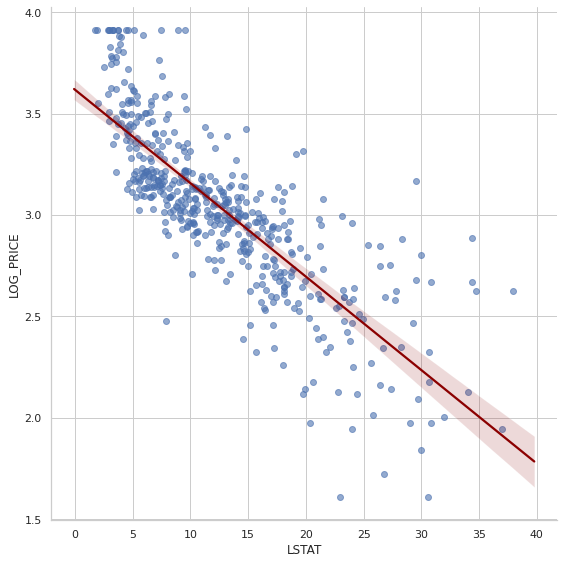

In [46]:
transformed_data = features
transformed_data["LOG_PRICE"] = y_log

sns.lmplot(x="LSTAT",
           y="LOG_PRICE", 
           data=transformed_data, 
           height=8, 
           scatter_kws={"alpha":0.6}, 
           line_kws={"color":"darkred"})
plt.show()

## Reggresion with Log.Price

In [47]:
prices = np.log(data["PRICE"]) # Use log prices
features = data.drop("PRICE", axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    prices, 
                                                    test_size=0.2, 
                                                    random_state=10)


In [48]:
%%time
regr = LinearRegression()
regr.fit(X_train, y_train)

CPU times: user 5.75 ms, sys: 0 ns, total: 5.75 ms
Wall time: 5.39 ms


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
print("Tntercept", regr.intercept_)
print("Train data r-squared: ", regr.score(X_train, y_train))
print("Test data r-squared: ", regr.score(X_test, y_test))
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=["coef"])
# Higher fit in R-qsuared is better

Tntercept 4.059943871775192
Train data r-squared:  0.7930234826697583
Test data r-squared:  0.7446922306260735


,coef
CRIM,-0.010672
ZN,0.001579
INDUS,0.002030
CHAS,0.080331
NOX,-0.704068
RM,0.073404
AGE,0.000763
DIS,-0.047633
RAD,0.014565
TAX,-0.000645


In [50]:
np.e**0.080475

1.0838017512597784

Para saber cuales datos son mas significates se usan los P-Values. si p-values < 0.05 significa que es estadisticamente significante si por el contrario p-values > 0.05 entonces no es significativo estadisticamente

## P-Values & Evaluating Coefficients

In [51]:
X_incl_const = sm.add_constant(X_train)

# OLS -> Ordinary Least Square (Linear Regression)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()


#results.params
pd.DataFrame({"coef": results.params, "p-values": round(results.pvalues,3)})

,coef,p-values
const,4.059944,0.000
CRIM,-0.010672,0.000
ZN,0.001579,0.009
INDUS,0.002030,0.445
CHAS,0.080331,0.038
NOX,-0.704068,0.000
RM,0.073404,0.000
AGE,0.000763,0.209
DIS,-0.047633,0.000
RAD,0.014565,0.000


Multicollinearity -> Loss ofreliability, High variability in $\theta$  estimates, Strange findings (Pérdida de confiabilidad, alta variabilidad en las estimaciones de $ \theta $, hallazgos extraños). Para solucionar este problemas podemos utilizar el VIF (Variace Inflation Factor)


## Testing for Multicolliearity

$$ TAX = \alpha_0 + \alpha_1 RM+ \alpha_2 NOX + \dots + \alpha_{12} LSTAT $$

$$ VIF _{TAX} = \frac{1}{(1 - R_{TAX}^2)} $$

In [52]:
variance_inflation_factor(exog=X_incl_const.values,exog_idx=1)

1.7145250443932485

In [53]:
len(X_incl_const.columns)

14

In [54]:
X_incl_const.shape[1]

14

In [55]:
vif = []
for i in range (X_incl_const.shape[1]):
    vif.append(variance_inflation_factor(exog=X_incl_const.values,exog_idx=i))
print(vif)

[597.5487126763895, 1.7145250443932485, 2.3328224265597597, 3.943448822674638, 1.0788133385000578, 4.410320817897635, 1.8404053075678575, 3.3267660823099394, 4.222923410477865, 7.314299817005058, 8.508856493040817, 1.8399116326514064, 1.3386713255364717, 2.812544292793036]


In [56]:
vif = [variance_inflation_factor(exog=X_incl_const.values,
                                 exog_idx=i) for i in range (X_incl_const.shape[1])]
print(vif)

[597.5487126763895, 1.7145250443932485, 2.3328224265597597, 3.943448822674638, 1.0788133385000578, 4.410320817897635, 1.8404053075678575, 3.3267660823099394, 4.222923410477865, 7.314299817005058, 8.508856493040817, 1.8399116326514064, 1.3386713255364717, 2.812544292793036]


In [57]:
# VIF > 10 es considerado problematico
pd.DataFrame({"coef_name": X_incl_const.columns, "VIF": np.around(vif,2)})

,coef_name,VIF
0,const,597.55
1,CRIM,1.71
2,ZN,2.33
3,INDUS,3.94
4,CHAS,1.08
5,NOX,4.41
6,RM,1.84
7,AGE,3.33
8,DIS,4.22
9,RAD,7.31


## Model Simplification & the BIC

In [58]:
# Original model with log price
X_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

org_coef = pd.DataFrame({"coef": results.params, "p-values": round(results.pvalues,3)})

results.bic

-139.74997769478875

In [59]:
results.rsquared

0.7930234826697583

In [60]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     114.9
Date:                Fri, 05 Jun 2020   Prob (F-statistic):          1.70e-124
Time:                        23:26:55   Log-Likelihood:                 111.88
No. Observations:                 404   AIC:                            -195.8
Df Residuals:                     390   BIC:                            -139.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0599      0.227     17.880      0.000       3.614       4.506
CRIM          -0.0107      0.001     -7.971      0.000      -0.013      -0.008
ZN             0.0016      0.001      2.641      0.009       0.000       0.003
INDUS          0.0020      0.003      0.765      0.445      -0.003       0.007
CHAS           0.0803      0.039      2.079      0.038       0.004       0.156
NOX           -0.7041      0.166     -4.245      0.000      -1.030      -0.378
RM             0.0734      0.019      3.910      0.000       0.036       0.110
AGE            0.0008      0.001      1.258      0.209      -0.000       0.002
DIS           -0.0476      0.009     -5.313      0.000      -0.065      -0.030
RAD            0.0146      0.003      5.170      0.000       0.009       0.020
TAX           -0.0006      0.000     -4.095      0.000      -0.001      -0.000
PTRATIO       -0.0348      0.006     -5.908      0.000      -0.046      -0.023
B              0.0005      0.000      4.578      0.000       0.000       0.001
LSTAT         -0.0314      0.002    -14.213      0.000      -0.036      -0.027
==============================================================================
Omnibus:                       28.711   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              105.952
Skew:                           0.093   Prob(JB):                     9.84e-24
Kurtosis:                       5.502   Cond. No.                     1.54e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.54e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [61]:
# Reduced model #1 excluding INDUS
X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(["INDUS"], axis=1)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

org_minus_indus = pd.DataFrame({"coef": results.params, "p-values": round(results.pvalues,3)})

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     124.6
Date:                Fri, 05 Jun 2020   Prob (F-statistic):          1.99e-125
Time:                        23:26:55   Log-Likelihood:                 111.58
No. Observations:                 404   AIC:                            -197.2
Df Residuals:                     391   BIC:                            -145.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0562      0.227     17.878      0.000       3.610       4.502
CRIM          -0.0107      0.001     -8.022      0.000      -0.013      -0.008
ZN             0.0016      0.001      2.599      0.010       0.000       0.003
CHAS           0.0828      0.038      2.152      0.032       0.007       0.158
NOX           -0.6734      0.161     -4.187      0.000      -0.990      -0.357
RM             0.0717      0.019      3.849      0.000       0.035       0.108
AGE            0.0008      0.001      1.264      0.207      -0.000       0.002
DIS           -0.0494      0.009     -5.704      0.000      -0.066      -0.032
RAD            0.0140      0.003      5.148      0.000       0.009       0.019
TAX           -0.0006      0.000     -4.140      0.000      -0.001      -0.000
PTRATIO       -0.0341      0.006     -5.862      0.000      -0.046      -0.023
B              0.0005      0.000      4.543      0.000       0.000       0.001
LSTAT         -0.0313      0.002    -14.203      0.000      -0.036      -0.027
==============================================================================
Omnibus:                       28.529   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              105.223
Skew:                           0.085   Prob(JB):                     1.42e-23
Kurtosis:                       5.494   Cond. No.                     1.53e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.53e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [62]:
# Reduced model #1 excluding INDU and AGE
X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(["INDUS", "AGE"], axis=1)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

reduced_coef = pd.DataFrame({"coef": results.params, "p-values": round(results.pvalues,3)})

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     135.6
Date:                Fri, 05 Jun 2020   Prob (F-statistic):          3.68e-126
Time:                        23:26:55   Log-Likelihood:                 110.76
No. Observations:                 404   AIC:                            -197.5
Df Residuals:                     392   BIC:                            -149.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0359      0.226     17.819      0.000       3.591       4.481
CRIM          -0.0107      0.001     -8.002      0.000      -0.013      -0.008
ZN             0.0015      0.001      2.465      0.014       0.000       0.003
CHAS           0.0864      0.038      2.251      0.025       0.011       0.162
NOX           -0.6164      0.155     -3.990      0.000      -0.920      -0.313
RM             0.0761      0.018      4.155      0.000       0.040       0.112
DIS           -0.0527      0.008     -6.376      0.000      -0.069      -0.036
RAD            0.0137      0.003      5.060      0.000       0.008       0.019
TAX           -0.0006      0.000     -4.098      0.000      -0.001      -0.000
PTRATIO       -0.0335      0.006     -5.770      0.000      -0.045      -0.022
B              0.0005      0.000      4.611      0.000       0.000       0.001
LSTAT         -0.0303      0.002    -14.706      0.000      -0.034      -0.026
==============================================================================
Omnibus:                       30.564   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              117.705
Skew:                           0.117   Prob(JB):                     2.76e-26
Kurtosis:                       5.634   Cond. No.                     1.50e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.5e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [63]:
frames = [org_coef, org_minus_indus, reduced_coef]
pd.concat(frames, axis=1)

,coef,p-values,coef,p-values,coef,p-values
const,4.059944,0.000,4.056231,0.000,4.035922,0.000
CRIM,-0.010672,0.000,-0.010721,0.000,-0.010702,0.000
ZN,0.001579,0.009,0.001551,0.010,0.001461,0.014
INDUS,0.002030,0.445,NaN,NaN,NaN,NaN
CHAS,0.080331,0.038,0.082795,0.032,0.086449,0.025
NOX,-0.704068,0.000,-0.673365,0.000,-0.616448,0.000
RM,0.073404,0.000,0.071739,0.000,0.076133,0.000
AGE,0.000763,0.209,0.000766,0.207,NaN,NaN
DIS,-0.047633,0.000,-0.049394,0.000,-0.052692,0.000
RAD,0.014565,0.000,0.014014,0.000,0.013743,0.000


## Residual & Residual Plots

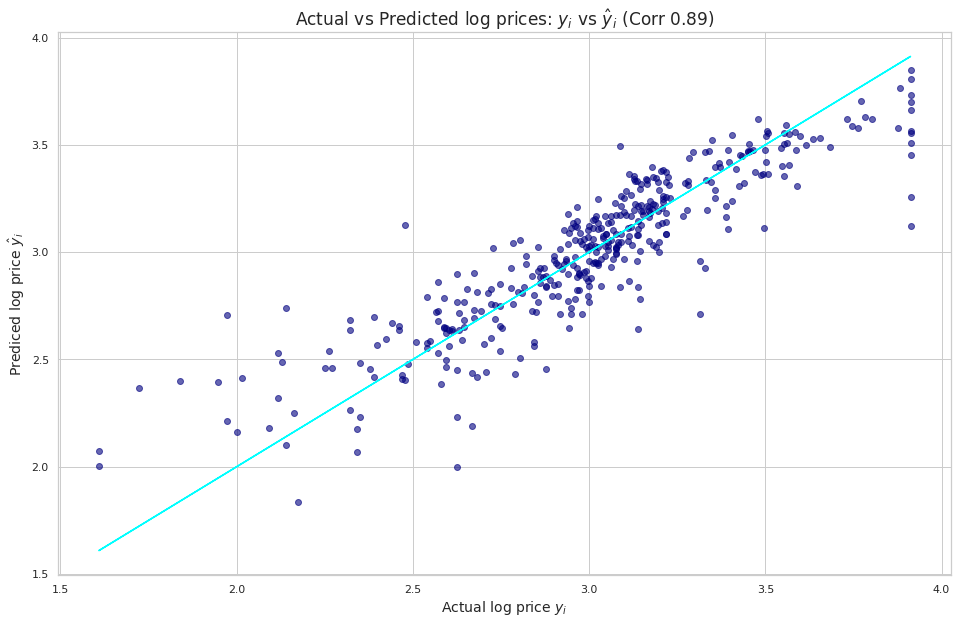

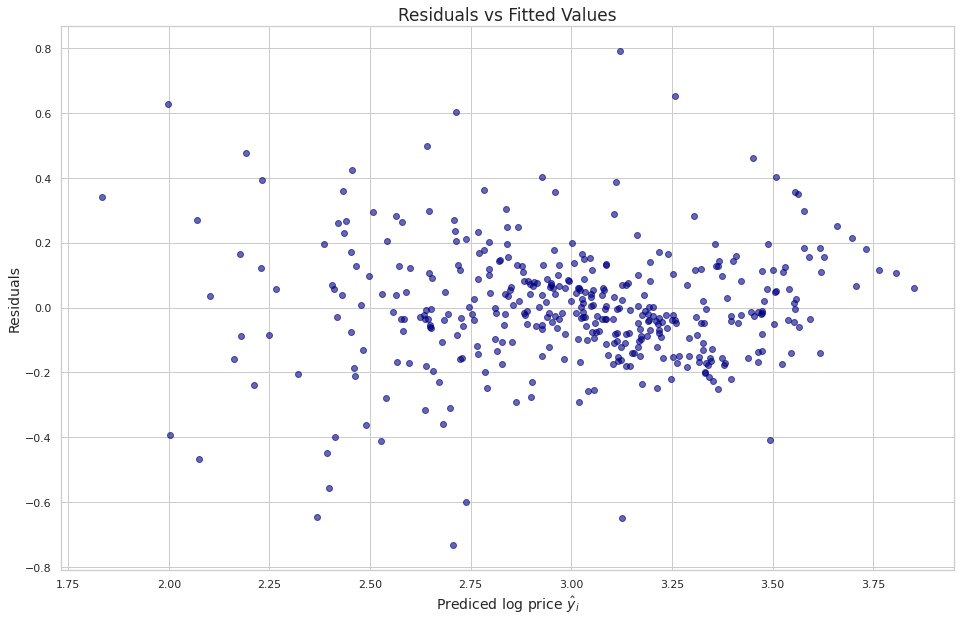

In [81]:
# Modified model: transformed (using log prices) & simplified (dropping two features)
prices = np.log(data["PRICE"]) # Use log prices
features = data.drop(["PRICE","INDUS","AGE"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    prices, 
                                                    test_size=0.2, 
                                                    random_state=10)
# using stasmodels
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()
# Residual
#residuals = y_train - results.fittedvalues

# Graph of Actual vs Predict Prices
corr = round(y_train.corr(results.fittedvalues),2)


plt.figure(figsize=(16,10))
plt.scatter(x=y_train, y=results.fittedvalues, c="navy", alpha=0.6)
plt.plot(y_train, y_train, color="cyan")
plt.xlabel("Actual log price $y_i$",fontsize=14)
plt.ylabel("Prediced log price $\hat y_i$", fontsize=14)
plt.title(f"Actual vs Predicted log prices: $y _i$ vs $\hat y_i$ (Corr {corr})", fontsize=17)
plt.show()

# Residual vs Predicted values

plt.figure(figsize=(16,10))
plt.scatter(x=results.fittedvalues, y=results.resid, c="navy", alpha=0.6)
plt.xlabel("Prediced log price $\hat y_i$",fontsize=14)
plt.ylabel("Residuals", fontsize=14)
plt.title(f"Residuals vs Fitted Values", fontsize=17)
plt.show()


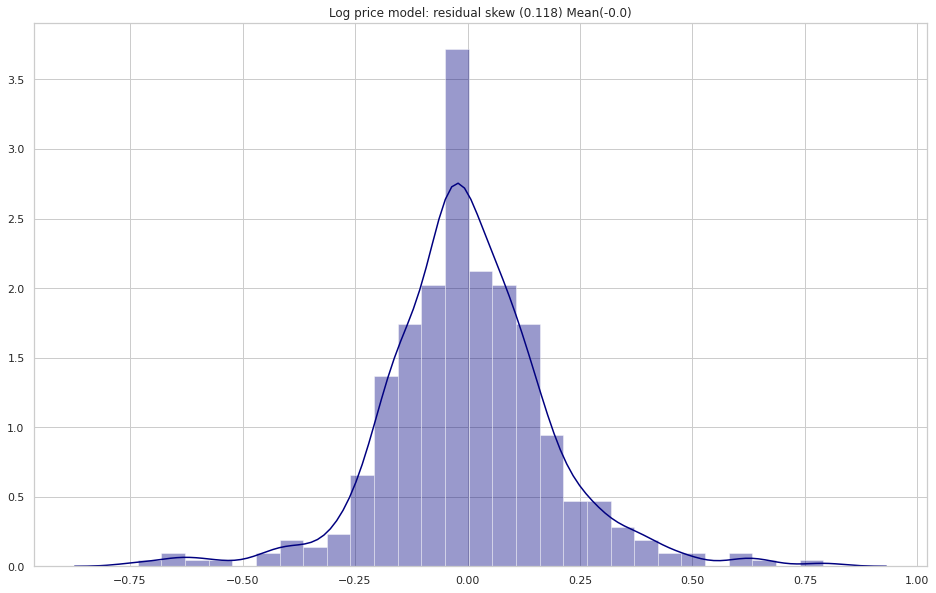

In [90]:
# Distribution of Residuals (log prices) - cheking for normality
plt.figure(figsize=(16,10))
resid_mean = round(results.resid.mean(),3)
resid_sked = round(results.resid.skew(),3)

sns.distplot(results.resid, color="navy")
plt.title(f"Log price model: residual skew ({resid_sked}) Mean({resid_mean})")
plt.show()

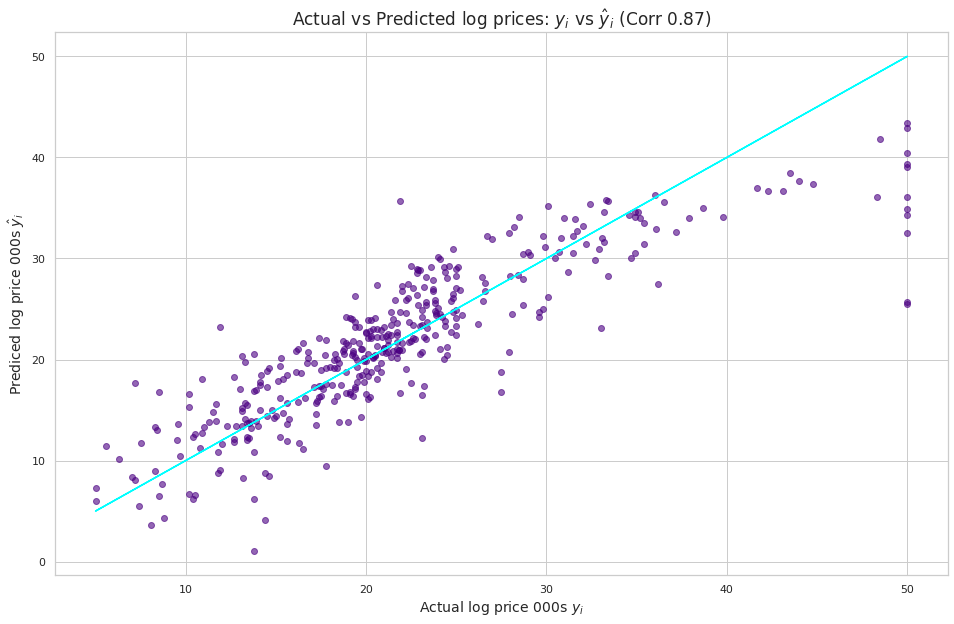

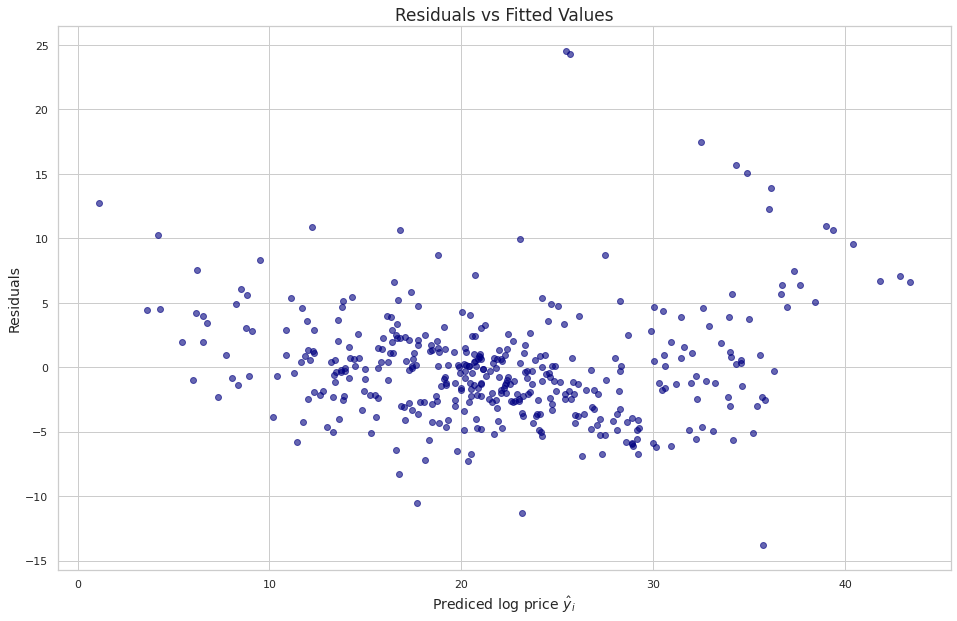

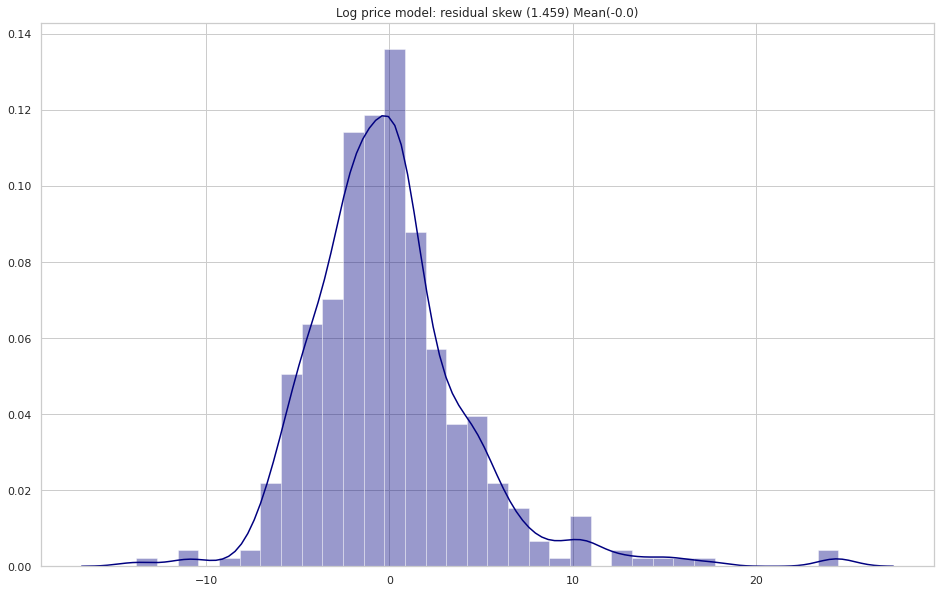

In [91]:
# Challenge
# Modified model: transformed (using log prices) & simplified (dropping two features)
prices = data["PRICE"] # Use log prices
features = data.drop(["PRICE"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    prices, 
                                                    test_size=0.2, 
                                                    random_state=10)
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()
# Residual
#residuals = y_train - results.fittedvalues

# Graph of Actual vs Predict Prices
corr = round(y_train.corr(results.fittedvalues),2)
plt.figure(figsize=(16,10))
plt.scatter(x=y_train, y=results.fittedvalues, c="indigo", alpha=0.6)
plt.plot(y_train, y_train, color="cyan")
plt.xlabel("Actual log price 000s $y_i$",fontsize=14)
plt.ylabel("Prediced log price 000s $\hat y_i$", fontsize=14)
plt.title(f"Actual vs Predicted log prices: $y _i$ vs $\hat y_i$ (Corr {corr})", fontsize=17)
plt.show()

# Residual vs Predicted values

plt.figure(figsize=(16,10))
plt.scatter(x=results.fittedvalues, y=results.resid, c="navy", alpha=0.6)
plt.xlabel("Prediced log price $\hat y_i$",fontsize=14)
plt.ylabel("Residuals", fontsize=14)
plt.title(f"Residuals vs Fitted Values", fontsize=17)
plt.show()

plt.figure(figsize=(16,10))
resid_mean = round(results.resid.mean(),3)
resid_sked = round(results.resid.skew(),3)

sns.distplot(results.resid, color="navy")
plt.title(f"Log price model: residual skew ({resid_sked}) Mean({resid_mean})")
plt.show()

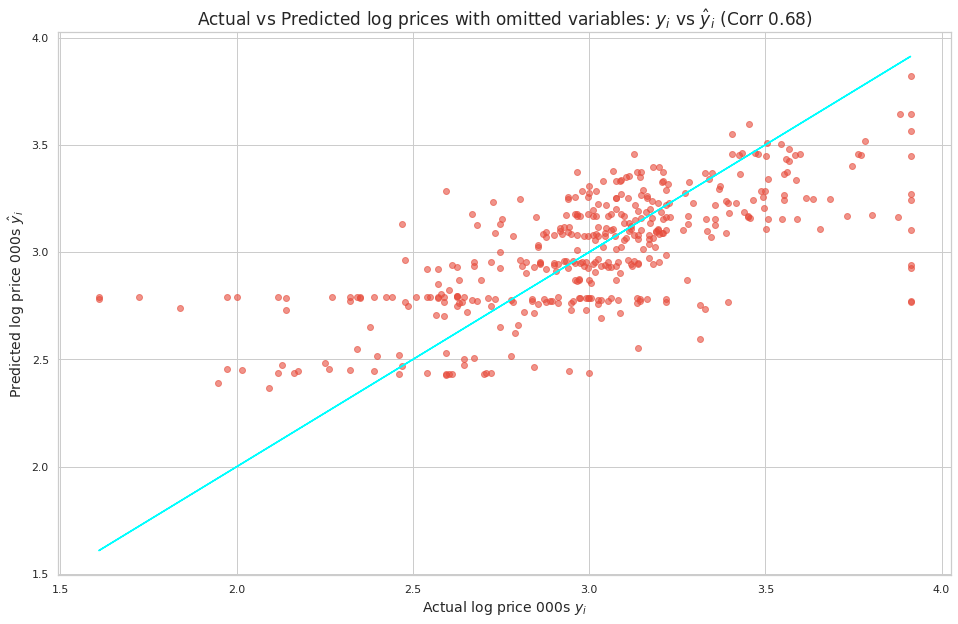

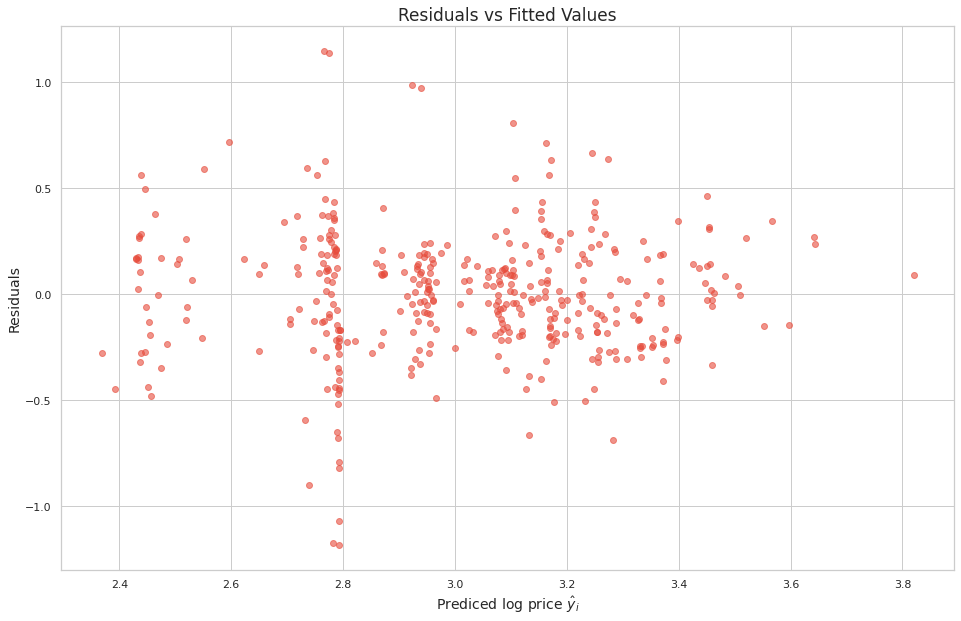

In [93]:
# Modified Omitting: Key features usgin log prices
prices = np.log(data["PRICE"]) # Use log prices
features = data.drop(["PRICE","INDUS","AGE","LSTAT","RM","NOX","CRIM"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    prices, 
                                                    test_size=0.2, 
                                                    random_state=10)
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()
# Residual
#residuals = y_train - results.fittedvalues

# Graph of Actual vs Predict Prices
corr = round(y_train.corr(results.fittedvalues),2)
plt.figure(figsize=(16,10))
plt.scatter(x=y_train, y=results.fittedvalues, c="#e74c3c", alpha=0.6)
plt.plot(y_train, y_train, color="cyan")
plt.xlabel("Actual log price 000s $y_i$",fontsize=14)
plt.ylabel("Predicted log price 000s $\hat y_i$", fontsize=14)
plt.title(f"Actual vs Predicted log prices with omitted variables: $y _i$ vs $\hat y_i$ (Corr {corr})", fontsize=17)
plt.show()

# Residual vs Predicted values

plt.figure(figsize=(16,10))
plt.scatter(x=results.fittedvalues, y=results.resid, c="#e74c3c", alpha=0.6)
plt.xlabel("Prediced log price $\hat y_i$",fontsize=14)
plt.ylabel("Residuals", fontsize=14)
plt.title(f"Residuals vs Fitted Values", fontsize=17)
plt.show()


In [ ]:

regr = LinearRegression()
regr.fit(X_train, y_train)

pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=["coef"])
